In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path

#  Corporación Favorita Grocery Sales

A classic, open-source retail dataset, available at https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data. 

EDA of Datasets

training set

In [4]:
df = pd.read_csv("train.csv", parse_dates = ['date'], infer_datetime_format=True)
df['date'] = df.date.dt.to_period('D')
df.head()

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

In [5]:
grouped_sales = df.groupby(by=['family'], as_index=False).sales.sum().sort_values(ascending=False, by='sales')
grouped_sales.head()

family         sales
12  GROCERY I  3.434627e+08
3   BEVERAGES  2.169545e+08
30    PRODUCE  1.227047e+08
7    CLEANING  9.752129e+07
8       DAIRY  6.448771e+07

In [6]:
import plotly.express as px

px.bar(grouped_sales, y = "family", x="sales", color = "family", title = "Total Sales By Family")

In [7]:
holidays = pd.read_csv("holidays_events.csv", parse_dates=['date'], infer_datetime_format=True,)
holidays.head()

date     type    locale locale_name                    description  \
0 2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1 2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2 2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3 2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4 2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

In [8]:
holidays.groupby(by='locale', as_index=False).count()

locale  date  type  locale_name  description  transferred
0     Local   152   152          152          152          152
1  National   174   174          174          174          174
2  Regional    24    24           24           24           24

In [9]:
holidays.groupby(by='locale_name', as_index=False).type.count().sort_values(by='type', ascending = False).head()

locale_name  type
4      Ecuador   174
18       Quito    13
0       Ambato    12
7     Guaranda    12
19    Riobamba    12

Ecuador has many more holidays than other locales.

In [10]:
holidays[holidays.locale_name == "Ecuador"].groupby(by = 'type', as_index=False).count()

type  date  locale  locale_name  description  transferred
0  Additional    40      40           40           40           40
1      Bridge     5       5            5            5            5
2       Event    56      56           56           56           56
3     Holiday    60      60           60           60           60
4    Transfer     8       8            8            8            8
5    Work Day     5       5            5            5            5

In [11]:
#and all locales have a minumum of one holiday a year (the Provincializacion):
holidays[holidays.locale_name == "Santa Elena"]

date     type    locale  locale_name                    description  \
24  2012-11-07  Holiday  Regional  Santa Elena  Provincializacion Santa Elena   
77  2013-11-07  Holiday  Regional  Santa Elena  Provincializacion Santa Elena   
140 2014-11-07  Holiday  Regional  Santa Elena  Provincializacion Santa Elena   
194 2015-11-07  Holiday  Regional  Santa Elena  Provincializacion Santa Elena   
279 2016-11-07  Holiday  Regional  Santa Elena  Provincializacion Santa Elena   
335 2017-11-07  Holiday  Regional  Santa Elena  Provincializacion Santa Elena   

     transferred  
24         False  
77         False  
140        False  
194        False  
279        False  
335        False

In [12]:
stores = pd.read_csv("stores.csv")
stores.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [13]:
stores.groupby(by='state').store_nbr.count()

state
Azuay                              3
Bolivar                            1
Chimborazo                         1
Cotopaxi                           2
El Oro                             2
Esmeraldas                         1
Guayas                            11
Imbabura                           1
Loja                               1
Los Rios                           2
Manabi                             3
Pastaza                            1
Pichincha                         19
Santa Elena                        1
Santo Domingo de los Tsachilas     3
Tungurahua                         2
Name: store_nbr, dtype: int64

In [14]:
trans = pd.read_csv("transactions.csv")
trans.head()

date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922

In [15]:
#We can take a quick look at the stores with the highest total sales:
trans.groupby(by='store_nbr').transactions.sum().sort_values(ascending = False).head()

store_nbr
44    7273093
47    6535810
45    6201115
46    5990113
3     5366350
Name: transactions, dtype: int64

In [16]:
#and check this corresponds with those with the highest mean:
trans.groupby(by='store_nbr').transactions.mean().sort_values(ascending = False).head()

store_nbr
44    4336.966607
47    3897.322600
45    3697.742993
46    3571.921884
3     3201.879475
Name: transactions, dtype: float64

In [17]:
oil = pd.read_csv(r"oil.csv")
oil.head()

date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20

We'll perform some checks on the completeness of the dataframes. Oil has missing values so we'll also interpolate those  - this is based on the assumption that oil price data is largely continuous and smooth. Of course there are oil price 'shocks' but estimating missing values based on local values reduces any loss to continuity or temporal relationship as much as possible. 

In [18]:
oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [19]:
oil['dcoilwtico'] = oil['dcoilwtico'].interpolate(method='linear') 
oil['dcoilwtico'] = oil['dcoilwtico'].fillna(value = 93.14)
oil.isna().sum()

date          0
dcoilwtico    0
dtype: int64

In [20]:
trans.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [21]:
holidays.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [22]:
stores.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [23]:
df.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

To visualise the sales data, we can sum the daily sales and plot them. 

''

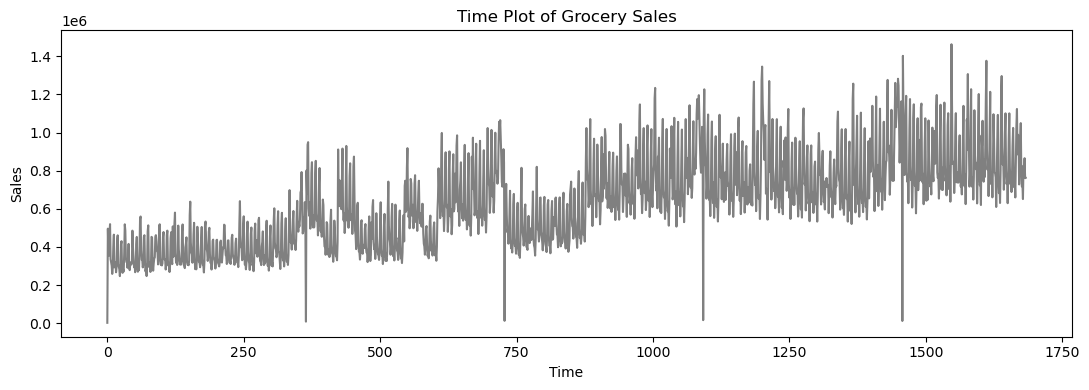

In [24]:
daily_sales = df.groupby(by='date', as_index=False).sales.sum()

plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=20,
    titleweight='bold',
)
fig, ax = plt.subplots()
ax.plot('sales', data=daily_sales, color='grey')
ax.set(xlabel='Time', ylabel='Sales')
ax.set_title('Time Plot of Grocery Sales')
;

We can see some outlying data falling once a year around the start of the year. Let's take a look at the Christmas period.

In [25]:
daily_sales.loc[355:365]

date          sales
355  2013-12-22  696295.146867
356  2013-12-23  792865.284427
357  2013-12-24  620663.290732
358  2013-12-26  470731.162414
359  2013-12-27  479314.968043
360  2013-12-28  556952.305979
361  2013-12-29  499719.504924
362  2013-12-30  635134.735851
363  2013-12-31  507264.663048
364  2014-01-01    8602.065404
365  2014-01-02  801011.226041

It appears that there is no sales data for Christmas day and New Years Day is anomalously quiet. We can look to account for this in our models. 

## Linear Regression

We can look into how well linear regression can describe the daily sales aggregates, as a baseline to compare future models to. We'll perform a train-test split here, to avoid data leakage. As we're working with time series, we'll take 2017 as the test set and train on proceeding years. 

C:\Users\benso\AppData\Local\Temp\ipykernel_17260\1014432188.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



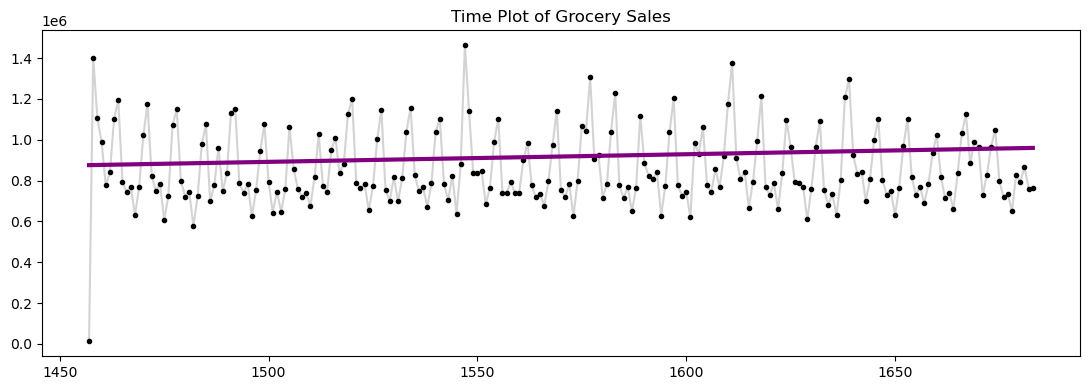

In [26]:
from sklearn.linear_model import LinearRegression

train = daily_sales[daily_sales.date < '2017-01-01']
test = daily_sales.copy()

train['Time'] = np.arange(len(train.index))
test['Time'] = np.arange(len(test.index))

# Training data
X_train = train.loc[:, ['Time']]  # features
y_train = train.loc[:, 'sales']  # target

X_test = test.loc[:, ['Time']]  # features
y_test = test.loc[:, 'sales']

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = pd.Series(model.predict(X_test), index=X_test.index)

plot_params = dict(
    color="lightgray",
    style=".-",
    markeredgecolor="black",
    markerfacecolor="black",
    legend=False,
)

ax = y_test[len(train.index):].plot(**plot_params)
ax = y_pred[len(train.index):].plot(ax=ax, linewidth=3, color='purple')
ax.set_title('Time Plot of Grocery Sales');

Simple and inaccurate as this regression is, it does give us a baseline on which to improve. How closely it predicts 2017 sales can be see using the RMSE.

In [27]:
from sklearn.metrics import mean_squared_error

linear_reg_rmse = np.sqrt(mean_squared_error(y_test[len(train.index):], y_pred[len(train.index):]))
linear_reg_rmse

191788.05492755357

As we're looking at the total sales here, let's calculate the Percentage RMSE so it can be compared to other models later, once we introduce more granality to the predictions.

In [28]:
print("RMSPE for Linear Regression is " + str(round(linear_reg_rmse/daily_sales.sales.mean()*100,2))+"%.")

RMSPE for Linear Regression is 30.08%.


## Seasonality

Taking a look at the data using days, week and time within the year can give us insight into any patterns of seasonality. 

In [29]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

df = df.set_index("date")
#.to_period("D")

df['day'] = df.index.dayofweek
df['week'] = df.index.week
df['dayofyear'] = df.index.dayofyear
df['year'] = df.index.year

df.head()

id  store_nbr      family  sales  onpromotion  day  week  \
date                                                                   
2013-01-01   0          1  AUTOMOTIVE    0.0            0    1     1   
2013-01-01   1          1   BABY CARE    0.0            0    1     1   
2013-01-01   2          1      BEAUTY    0.0            0    1     1   
2013-01-01   3          1   BEVERAGES    0.0            0    1     1   
2013-01-01   4          1       BOOKS    0.0            0    1     1   

            dayofyear  year  
date                         
2013-01-01          1  2013  
2013-01-01          1  2013  
2013-01-01          1  2013  
2013-01-01          1  2013  
2013-01-01          1  2013

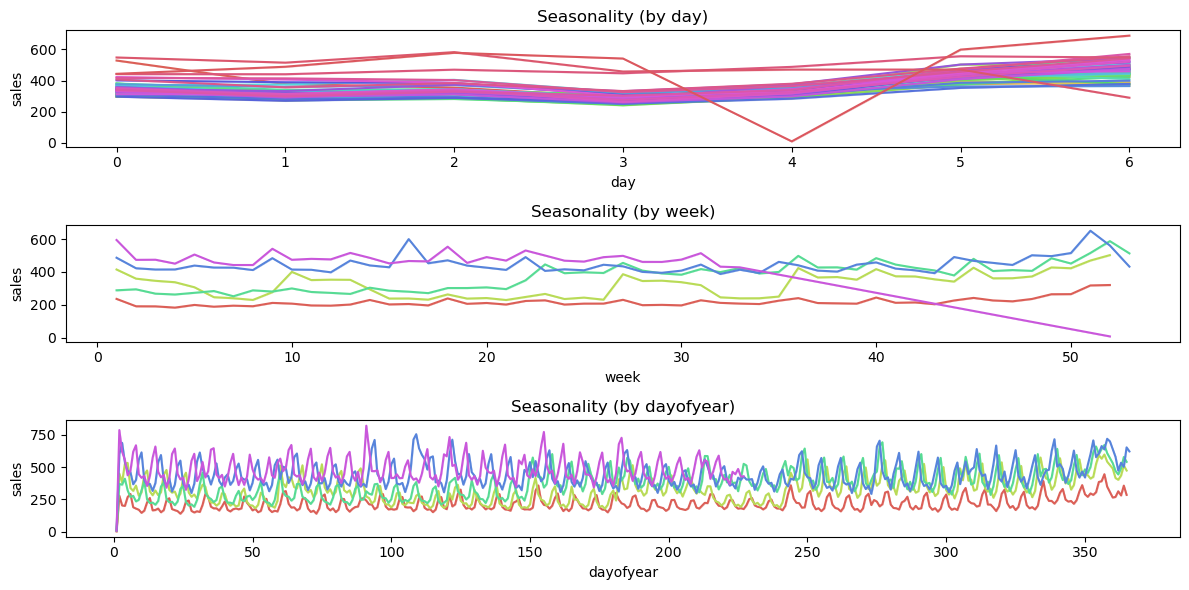

In [30]:
def seasonal_plot(X, y, timeframe, freq, ax=None):
    datapoints = X[timeframe].unique()
    palette = sns.color_palette("hls", n_colors=len(datapoints))

    if ax is None:
        _, ax = plt.subplots()
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=timeframe,
        data=X,
        errorbar=('ci', False),
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonality (by {freq})")    
    for line, name in zip(ax.lines, datapoints):
        y_ = line.get_ydata()[-1]
        
    return ax

X = df.copy()


fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(12, 6))
seasonal_plot(X, y="sales", timeframe = "week", freq="day", ax=ax0)
seasonal_plot(X, y="sales", timeframe = "year", freq="week", ax=ax1)
seasonal_plot(X, y="sales", timeframe = "year", freq="dayofyear", ax=ax2);

We can see above what we may assume intuitively - there is a very pronounced seasonality based on the day of the week. Perhaps suprisingly (given we're aware of a biweekly pay cycle), there doesn't appear to be much of a weekly seasonality to the data, across the year. Let's use Fourier features and some indicators to try and capture as much of the seasonality as possible. 

C:\Users\benso\AppData\Local\Temp\ipykernel_17260\3131777355.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



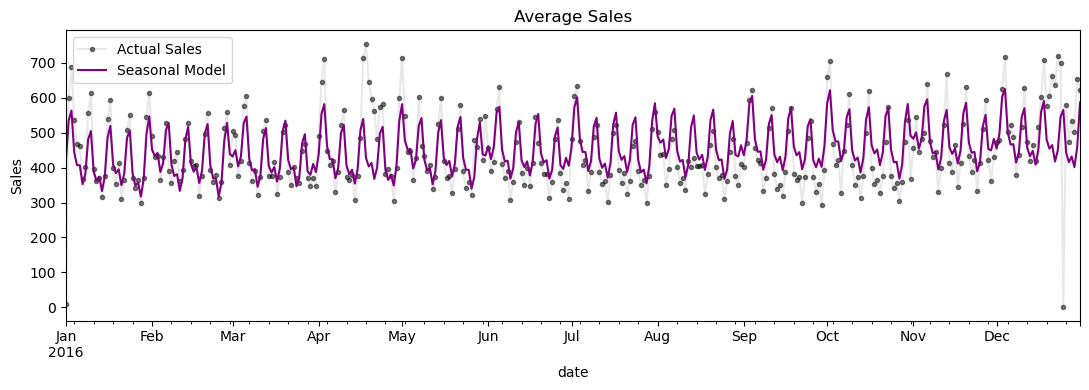

In [31]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

average_sales = df.groupby('date').sales.mean().reset_index()
xmas = pd.DataFrame({'date':['2013-12-25','2014-12-25','2015-12-25','2016-12-25'], 'sales' : 0.0 })
xmas['date'] = pd.to_datetime(xmas.date, format='%Y-%m-%d')
xmas['date'] = xmas.date.dt.to_period('D')
average_sales = average_sales.append(xmas).fillna(0.0).reset_index(drop=True)
average_sales.sort_values(by='date', inplace=True)
average_sales = average_sales.set_index("date").squeeze()

y_train = average_sales.loc[average_sales.index.year != 2017]

fourier = CalendarFourier(freq="M", order = 4)
dp = DeterministicProcess(
    index=y_train.index,
    constant=True,
    order=1,                    #ie linear
    seasonal=True,              #Weekly seasonality indicators
    additional_terms=[fourier], #Monthly seasonality via Fourier features
    drop=True,
)

X_train = dp.in_sample()
model = LinearRegression().fit(X_train, y_train)

y_pred = pd.Series(model.predict(X_train), index=X_train.index)
#Plotting the last complete years allows us to see how well the model performs
#in more detail

ax = y_train.loc['2016'].plot(**plot_params, alpha=0.5, title="Average Sales", ylabel="Sales", label = "Actual Sales")
ax = y_pred.loc['2016'].plot(ax=ax, label="Seasonal Model", color='purple')
ax.legend();

And by using the model to provide predictions for the held back test data (2017) we can see how well it extrapolates to new data. 

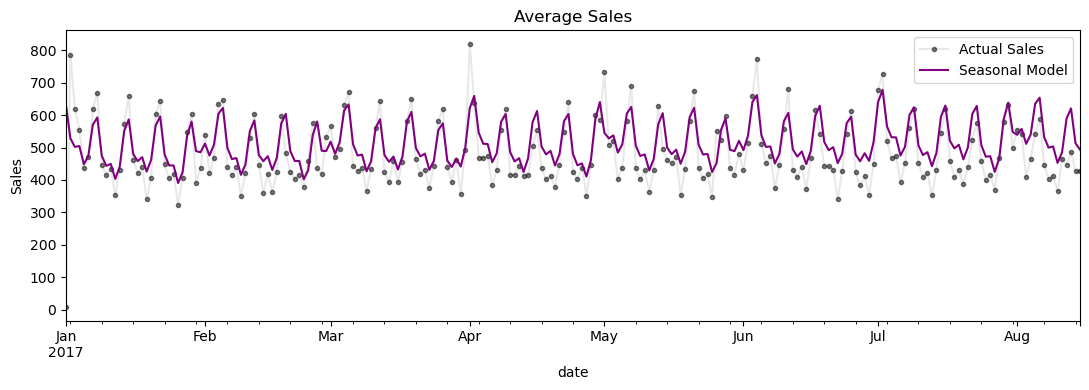

In [32]:
y_test = average_sales.copy()

fourier = CalendarFourier(freq="M", order = 4)
dp_test = DeterministicProcess(
    index=y_test.index,
    constant=True,
    order=1,                    #ie linear
    seasonal=True,              #Weekly seasonality indicators
    additional_terms=[fourier], #Monthly seasonality via Fourier features
    drop=True,
)

X_test = dp_test.in_sample()
y_pred = pd.Series(model.predict(X_test), index=X_test.index)

ax = y_test.loc['2017'].plot(**plot_params, alpha=0.5, title="Average Sales", ylabel="Sales", label = "Actual Sales")
ax = y_pred.loc['2017'].plot(ax=ax, label="Seasonal Model", color='purple')
ax.legend();

This appears to provide more reasonable predictions for the average sales than the simple regression line - we can put a figure on how well it performs on the testing data using Root Mean Squared Error (RMSE). 

In [33]:
from sklearn.metrics import mean_squared_error

seasonal_rmse = np.sqrt(mean_squared_error(y_test.loc['2017'], y_pred.loc['2017']))
seasonal_rmse

74.75699257875527

In [34]:
print("RMSPE for a linear regression with seasonality is " + str(round(seasonal_rmse/y_test.loc['2017'].mean()*100,2))+"%.")

RMSPE for a linear regression with seasonality is 15.57%.


## Attributes

HOLIDAY DATA

We've seen the impact on sales caused by New Year's Day and the missing Christmas Day data points. We'll encode those straight away and move onto investigating the predictive validity of the holiday data. 

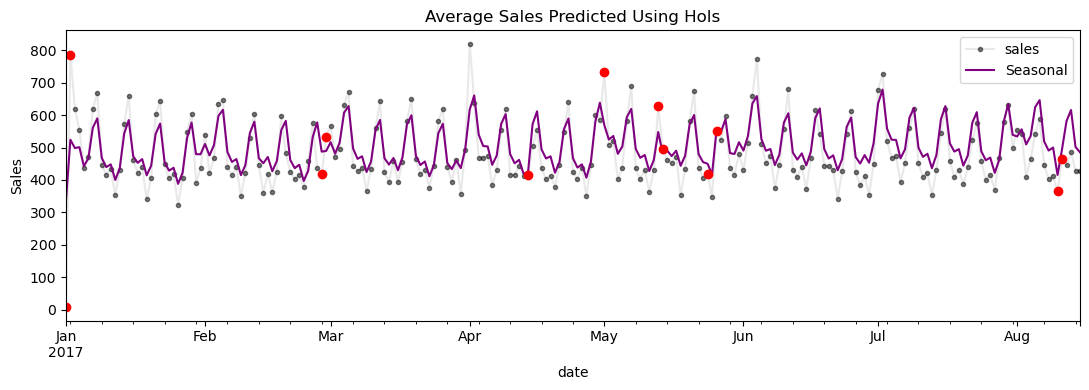

In [35]:
X_train['NewYear'] = (X_train.index.dayofyear == 1)
X_train.loc[X_train.NewYear, "NewYear"] = 1
X_train.loc[X_train.NewYear == False, "NewYear"] = 0

X_test['NewYear'] = (X_test.index.dayofyear == 1)
X_test.loc[X_test.NewYear, "NewYear"] = 1
X_test.loc[X_test.NewYear == False, "NewYear"] = 0

holidays_nat = holidays.loc[holidays.locale == "National"][['date','description']].set_index('date').to_period('D')

X_holidays = pd.get_dummies(holidays_nat)
X_holidays = X_holidays.groupby(by='date').sum()
X_holidays.head()
X_w_hols_train = X_train.join(X_holidays, on='date').fillna(0.0)
X_w_hols_test = X_test.join(X_holidays, on='date').fillna(0.0)

model = LinearRegression().fit(X_w_hols_train, y_train)
y_pred = pd.Series(model.predict(X_w_hols_test), index=X_w_hols_test.index)
ax = y_test.loc['2017'].plot(**plot_params, alpha=0.5, title="Average Sales Predicted Using Hols", ylabel="Sales")
ax = y_pred.loc['2017'].plot(ax=ax, label="Seasonal",  color='purple')
hols_2017 = X_holidays.loc['2017'].reset_index()
hols_2017 = hols_2017[hols_2017.date < '2017-08-16']
plt.plot_date(hols_2017.date, y_test[hols_2017.date], color='red')

ax.legend();

In [36]:
hols_rmse = np.sqrt(mean_squared_error(y_test.loc['2017'], y_pred.loc['2017']))
hols_rmse

60.23475219522987

In [37]:
print("RMSPE for a linear regression with seasonality and national holidays is " + str(round(hols_rmse/y_test.loc['2017'].mean()*100,2))+"%.")

RMSPE for a linear regression with seasonality and national holidays is 12.55%.


Interestingly, though, if we just train the model on the 2016 data, we see a marked improvement in how well the model predicts in 2017. 

C:\Users\benso\AppData\Local\Temp\ipykernel_17260\2295226392.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\benso\AppData\Local\Temp\ipykernel_17260\2295226392.py:4: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



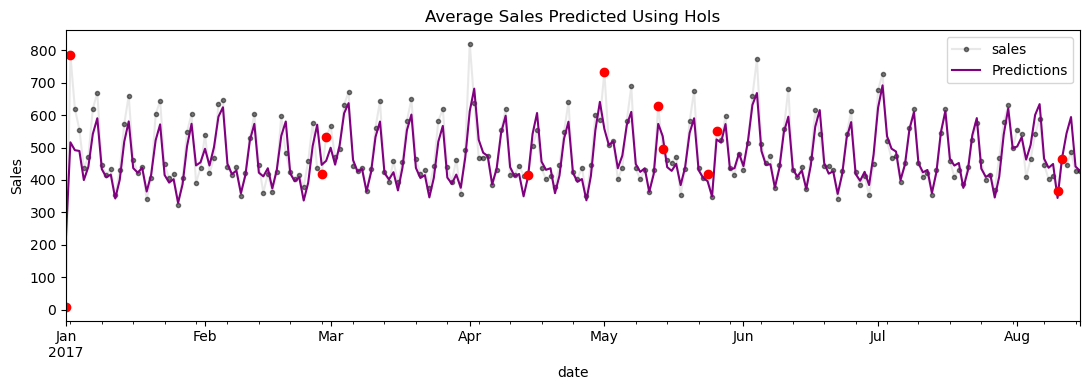

In [38]:
X_w_hols_train_2016 = X_w_hols_train.loc['2016']
y_train_2016 = y_train.loc['2016']
X_w_hols_test_2016 = X_w_hols_test.loc['2016'].append(X_w_hols_test.loc['2017'])
y_test_2016 = y_test.loc['2016'].append(y_test.loc['2017'])

model = LinearRegression().fit(X_w_hols_train_2016, y_train_2016)
y_pred_2016 = pd.Series(model.predict(X_w_hols_test_2016), index=X_w_hols_test_2016.index)
ax = y_test_2016.loc['2017'].plot(**plot_params, alpha=0.5, title="Average Sales Predicted Using Hols", ylabel="Sales")
ax = y_pred_2016.loc['2017'].plot(ax=ax, label="Predictions", color='purple')
hols_2017 = X_holidays.loc['2017'].reset_index()
hols_2017 = hols_2017[hols_2017.date < '2017-08-16']
plt.plot_date(hols_2017.date, y_test_2016[hols_2017.date], color='red')

ax.legend();

In [39]:
hols_2016_rmse = np.sqrt(mean_squared_error(y_test_2016.loc['2017'], y_pred_2016.loc['2017']))
hols_2016_rmse

46.785301459618175

In [40]:
print("RMSPE for a linear regression with seasonality and national holidays, trained only on the last full year of data, is " + str(round(hols_2016_rmse/y_test.loc['2017'].mean()*100,2))+"%.")

RMSPE for a linear regression with seasonality and national holidays, trained only on the last full year of data, is 9.74%.


The addition of holiday data has improved performance of our model - recent holidays and performance adding more value than older ones could suggest that lag features may help us in our predictions. First, we can try adding a simple 7-day rolling average, however, to see if that adds value. 

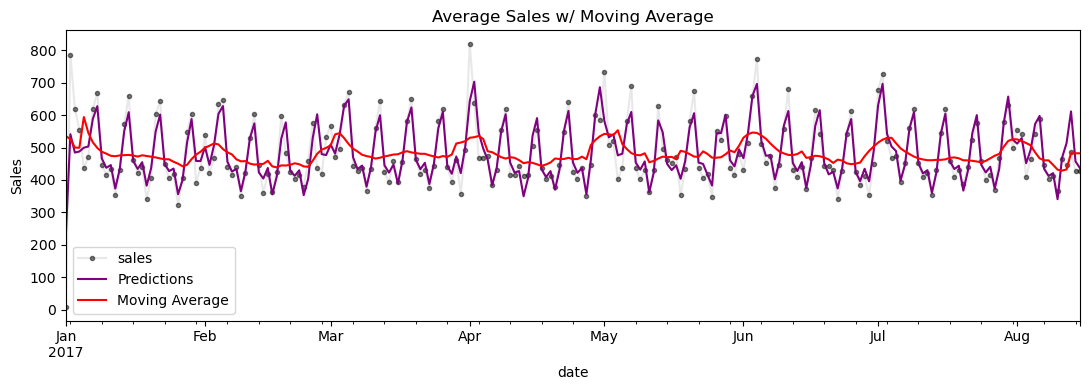

In [41]:
X_ma_train = X_w_hols_train_2016.copy()
X_ma_train['ma'] = y_train_2016.rolling(7, center=True).mean()
X_ma_train['ma'].fillna(value = X_ma_train.ma[3:6].mean(), inplace=True)

X_ma_test = X_w_hols_test_2016.copy()
X_ma_test['ma'] = y_test_2016.rolling(7, center=True).mean()
X_ma_test['ma'].fillna(value = X_ma_test.ma[3:6].mean(), inplace=True)

model = LinearRegression().fit(X_ma_train, y_train_2016)

y_pred_ma = pd.Series(model.predict(X_ma_test), index=X_ma_test.index)
ax = y_test_2016.loc['2017'].plot(**plot_params, alpha=0.5, title="Average Sales w/ Moving Average", ylabel="Sales")
ax = y_pred_ma.loc['2017'].plot(ax=ax, label="Predictions", color='purple')
ax = X_ma_test.loc['2017'].ma.plot(ax=ax, label="Moving Average", color='red')


ax.legend();

In [42]:
ma_rmse = np.sqrt(mean_squared_error(y_test_2016.loc['2017'], y_pred_ma.loc['2017']))
ma_rmse

43.96396026836033

In [43]:
print("RMSPE for a linear regression with seasonality, national holidays and a 7 day rolling average feature " + str(round(ma_rmse/y_test.loc['2017'].mean()*100,2))+"%.")

RMSPE for a linear regression with seasonality, national holidays and a 7 day rolling average feature 9.16%.


We're iteratively getting the model more successful on the mean daily sales. Looking at the above plot, we can see that although the model is capturing much of the weekly seasonality, it is missing the local minima and maxima. Let's see whether lag features may help with that. 

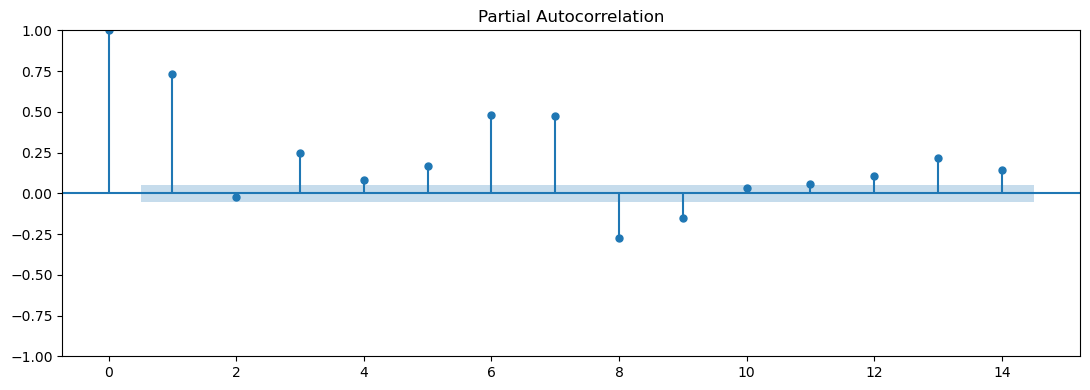

In [44]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(y_train, lags = 14);

We can see strong autocorrelation with the lagged sales data here - by plotting the deseasonalised data, we can see whether this partial autocorrelation can be explained by our existing model. 

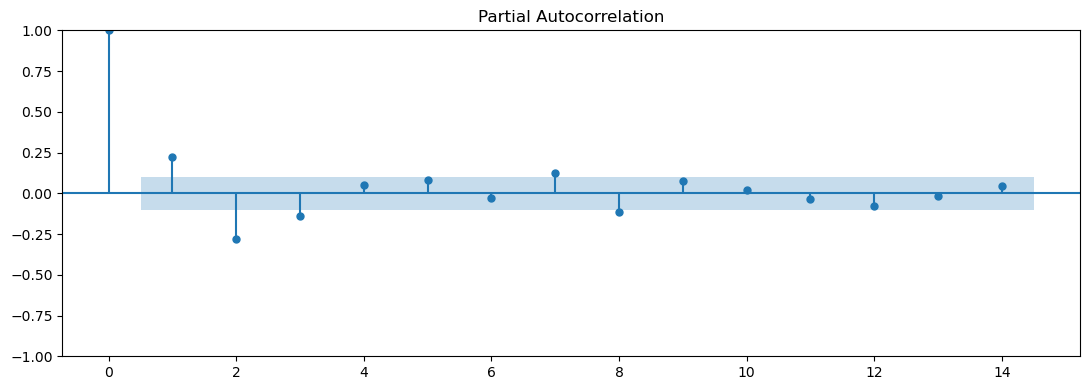

In [45]:
y_desea = y_train_2016 - model.predict(X_ma_train)
plot_pacf(y_desea, lags = 14);

We can see that deseasonalised lags of 1 & 2 days (and to a much lesser extent 3, 7 and 8) may add value to our linear model. With experimentation, we can find that lags of 1,2,3 and 7 days produce the lowest error on the mean sales predictions. 

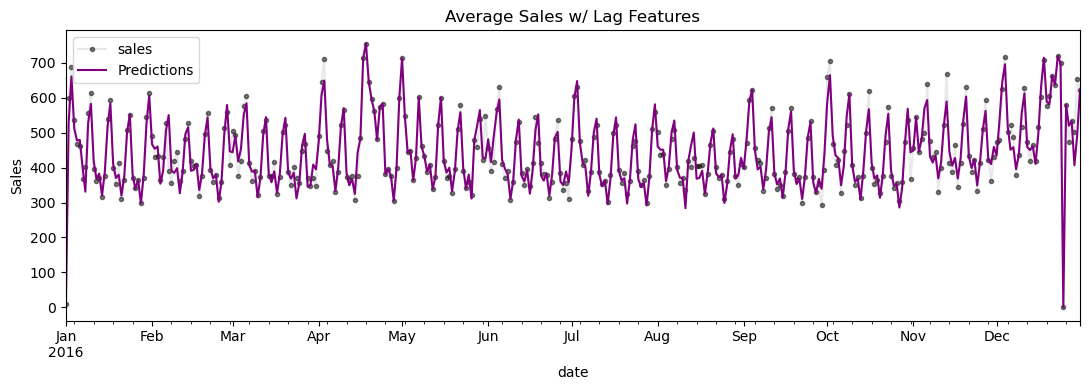

In [46]:
lags_to_create = [1, 2, 3, 7]
for lag in lags_to_create:
    X_ma_train[f'lag_{lag}'] = average_sales.shift(lag).fillna(average_sales.loc['2015'][-lag]).loc['2016']
    X_ma_test[f'lag_{lag}'] = pd.concat([average_sales.shift(lag).fillna(average_sales.loc['2015'][-lag]).loc['2016'],
        average_sales.shift(lag).fillna(average_sales.loc['2015'][-lag]).loc['2017']])



model = LinearRegression().fit(X_ma_train, y_train_2016)
y_pred_ma = pd.Series(model.predict(X_ma_train), index=X_ma_train.index)
ax = y_train_2016.plot(**plot_params, alpha=0.5, title="Average Sales w/ Lag Features", ylabel="Sales")
ax = y_pred_ma.plot(ax=ax, label="Predictions", color='purple')


ax.legend();

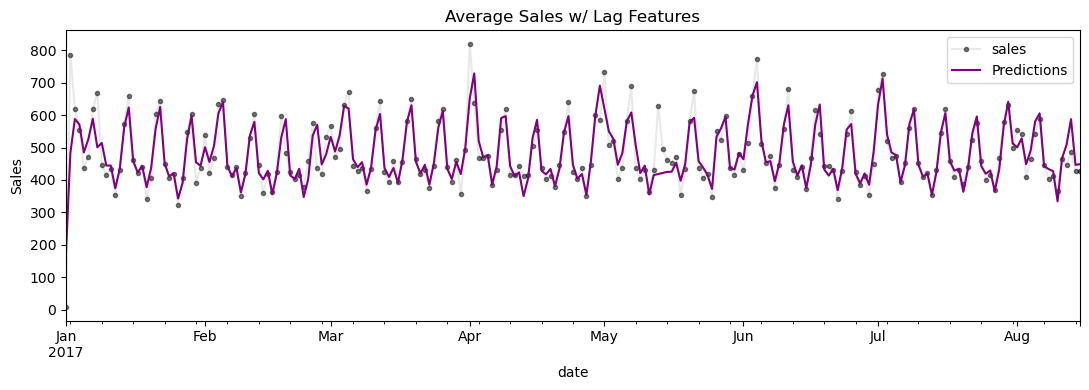

In [47]:
y_pred_ma = pd.Series(model.predict(X_ma_test), index=X_ma_test.index)
y_pred_ma = y_pred_ma.drop('2017-05-01', axis = 0)
y_pred_ma = y_pred_ma.drop('2017-05-13', axis = 0)
y_pred_ma = y_pred_ma.drop('2017-05-14', axis = 0)

ax = y_test_2016.loc['2017'].plot(**plot_params, alpha=0.5, title="Average Sales w/ Lag Features", ylabel="Sales")
ax = y_pred_ma.loc['2017'].plot(ax=ax, label="Predictions", color='purple')


ax.legend();

In [48]:
ma_rmse = np.sqrt(mean_squared_error(y_test_2016.loc['2017'], y_pred_ma.loc['2017']))
ma_rmse

42.19143602374948

In [49]:
print("Which equates to "+str(round(ma_rmse/y_test_2016.loc['2017'].mean()*100))+"% of the 2017 mean sales.")

Which equates to 9% of the 2017 mean sales.


By taking a look at the residuals for the mean sales, we can see whether they can be improved upon. We'll check that the residuals are normally distribution and dispplay homoscedasticity. We can also check that as much seasonality has been accounted for as possible.

In [50]:
residuals = y_test_2016 - y_pred_ma
residuals

date
2016-01-01     -0.000818
2016-01-02     68.297703
2016-01-03     27.221387
2016-01-04     24.854183
2016-01-05     -8.861508
                 ...    
2017-08-11     -3.284298
2017-08-12    -63.682813
2017-08-13   -101.834348
2017-08-14    -19.487645
2017-08-15    -20.564841
Freq: D, Length: 590, dtype: float64

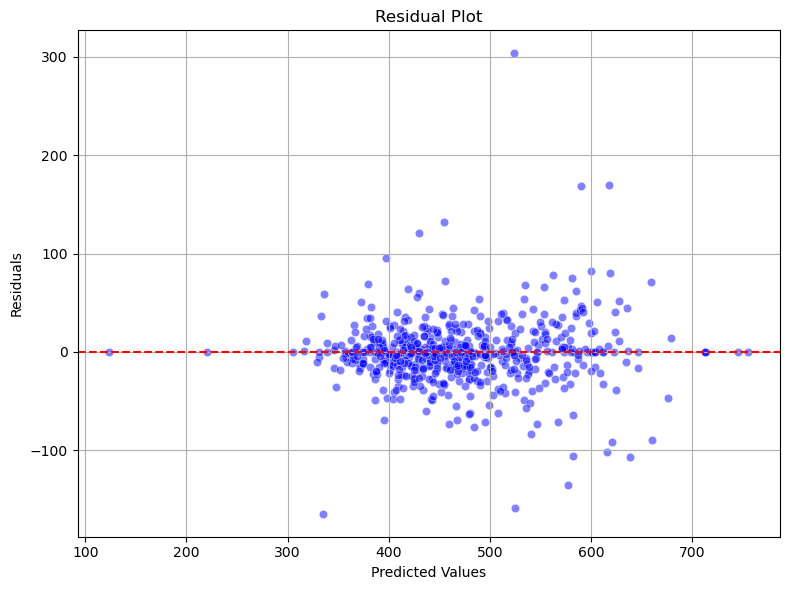

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

These are largely concentrated around the zero line, suggesting the model's predictions are unbiased, but there are several outliers that could be investigated further. 

In [52]:
residuals.idxmax()

Period('2017-01-02', 'D')

In [53]:
residuals.idxmin()

Period('2017-01-01', 'D')

So the model is over predicted New Year's Day and underpredicting the 2nd January. By working on improving the treatment of this period, we could reduce our error. 

In [54]:
from IPython.display import display, HTML
df1 = y_test_2016.head().to_frame()
df2 = y_test_2016.loc['2017'].head().to_frame()
df3 = y_pred_ma.head().to_frame()
df4 = y_pred_ma.loc['2017'].head().to_frame()

grid_html = f"<table><tr><th>2016_Sales</th><th>2017_Sales</th></tr><tr><td>{df1.head().to_html()}</td><td>{df2.head().to_html()}</td></tr><tr><th>2016_Pred</th><th>2017_Pred</th></tr><tr><td>{df3.head().to_html()}</td><td>{df4.head().to_html()}</td></tr></table>"

#grid_html = f"<table><tr><td>{df1.head().to_html()}</td><td>{df2.head().to_html()}</td></tr><tr><td>{df3.head().to_html()}</td><td>{df4.head().to_html()}</td></tr></table>"
display(HTML(grid_html))

As we aren't capturing an important aspect of annual seasonality, it may be worth re-extending the training period. It might be a trade-off against the gains we saw earlier by reducing it, but we can evaluate by how much. We'll add the features that have added predictive power to our model for the time period of the full dataset. 

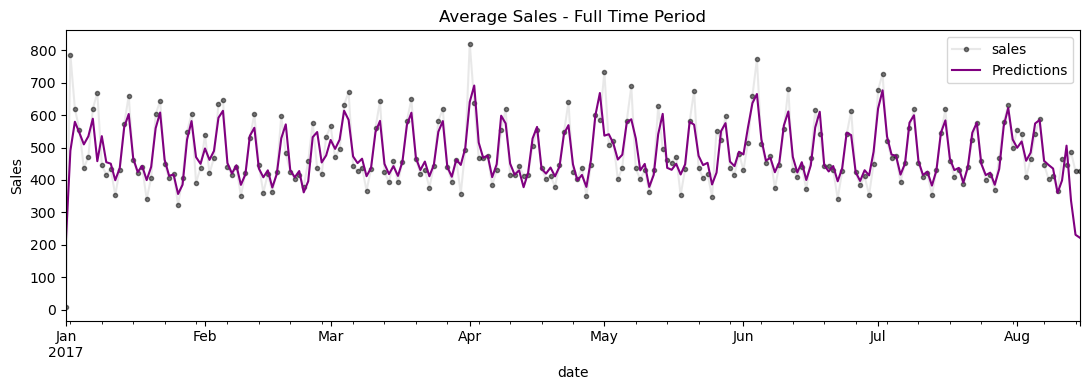

In [55]:
X_train['day'] = X_train.index.dayofweek
X_train['week'] = X_train.index.week
X_train['dayofyear'] = X_train.index.dayofyear
X_train['year'] = X_train.index.year

X_test['day'] = X_test.index.dayofweek
X_test['week'] = X_test.index.week
X_test['dayofyear'] = X_test.index.dayofyear
X_test['year'] = X_test.index.year
X_train = X_train[X_train !=2017]

X_train['ma'] = y_train.rolling(7, center=True).mean()
X_train['ma'].fillna(value = X_train.ma[3:6].mean(), inplace=True)

X_test['ma'] = y_test.rolling(7, center=True).mean()
X_test['ma'].fillna(value = X_test.ma[3:6].mean(), inplace=True)

X_train['NewYear'] = (X_train.index.dayofyear == 1)
X_train.loc[X_train.NewYear, "NewYear"] = 1
X_train.loc[X_train.NewYear == False, "NewYear"] = 0

X_test['NewYear'] = (X_test.index.dayofyear == 1)
X_test.loc[X_test.NewYear, "NewYear"] = 1
X_test.loc[X_test.NewYear == False, "NewYear"] = 0

# Lag features - 1, 2, 3 and 7 days - this time, we don't have access to data preceding the training period - we must
# interpolate. This isn't ideal for such a difficult time period to model. By comparison to following years,
# we can see that the mean of the first 5 days of sales of the new year, is comparable to that of the missing data.

lags_to_create = [1, 2, 3, 7]
for lag in lags_to_create:
    X_train[f'lag_{lag}'] = y_train.shift(lag).fillna(y_test[0:4].mean())
    X_test[f'lag_{lag}'] = y_test.shift(lag).fillna(y_test[0:4].mean())

model = LinearRegression().fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_test), index=X_test.index)
ax = y_test.loc['2017'].plot(**plot_params, alpha=0.5, title="Average Sales - Full Time Period", ylabel="Sales")
ax = y_pred.loc['2017'].plot(ax=ax, label="Predictions", color='purple')


ax.legend();

In [56]:
full_rmse = np.sqrt(mean_squared_error(y_test.loc['2017'], y_pred.loc['2017']))
full_rmse

54.59281296849061

As this isn't as accurate on the test set as our previous best model, we'll continue with our previous strategy of using the reduced date range. Now that we've captured as much seasonality as possible, we'll try and further improve our predictions by hybridising the linear regression model with a Machine Learning algorithm. If we find the most successful model also over-predicts New Year's sales, we can consider dropping those data points from the training data altogether and predicting them as zero. As shown below, they are negligible.

In [57]:
average_sales[average_sales < 20]

date
2013-01-01    1.409438
2013-12-25    0.000000
2014-01-01    4.827197
2014-12-25    0.000000
2015-01-01    7.168135
2015-12-25    0.000000
2016-01-01    9.221882
2016-12-25    0.000000
2017-01-01    6.780304
Freq: D, Name: sales, dtype: float64

Hybridisation of the Model

As we're unsure what type of model we'll be hybridising our linear regression with, yet, let's add the linear regression predictions to the training data. We'll search through a number of algorithms to produce a stacked hybrid. 

In [58]:
lin_reg_preds = y_pred_ma.reset_index()
lin_reg_preds.columns = ['date','lin_reg_preds']
X_ma_train = X_ma_train.merge(lin_reg_preds, on = 'date', how='left')
X_ma_test = X_ma_test.merge(lin_reg_preds, on = 'date', how='left')


In [ ]:
X_ma_test

               Model        RMSE        MAE        R2
0  Linear Regression   35.288106  20.433007  0.884322
1      Random Forest   31.052855  16.597553  0.910423
2  Gradient Boosting   37.875178  24.503504  0.866738
3                SVR  108.164333  77.915584 -0.086835
4              Lasso   33.671788  20.743093  0.894676
5              Ridge   33.511091  20.615384  0.895679
6         ElasticNet   33.670684  20.742616  0.894683
7            XGBoost   30.021720  11.901485  0.916273


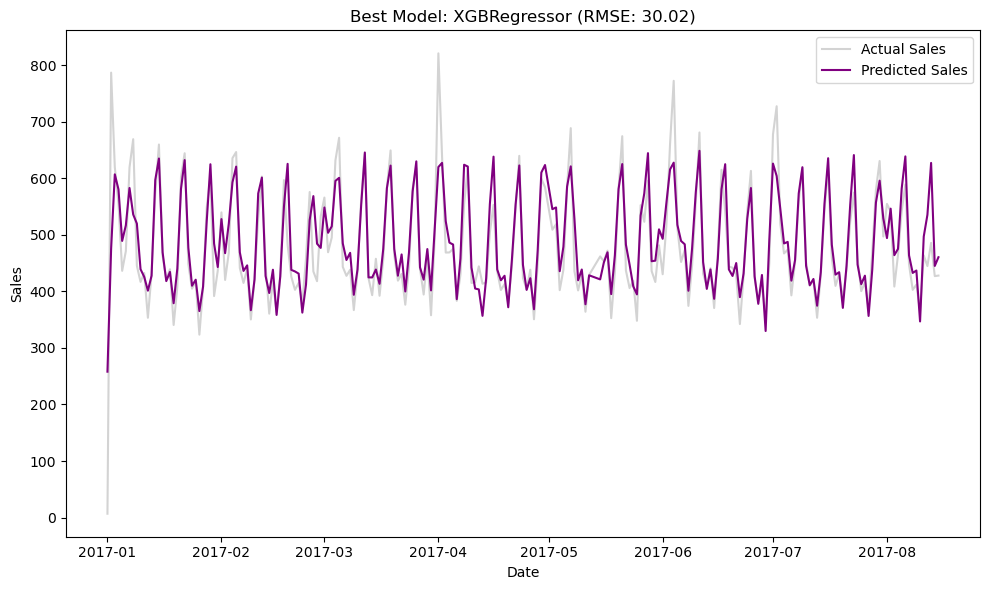

In [63]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "Lasso": Lasso(),
    "Ridge": Ridge(), 
    "ElasticNet": ElasticNet(),
    "XGBoost": XGBRegressor()
}

results = []

X_ma_train = X_ma_train.set_index("date")
X_ma_test = X_ma_test.set_index("date")

for model_name, model in models.items():
    model.fit(X_ma_train, y_train_2016)  # Train the model
    y_pred = model.predict(X_ma_test)  # Make predictions
    rmse = mean_squared_error(y_test_2016, y_pred, squared=False)
    mae = mean_absolute_error(y_test_2016, y_pred)
    r2 = r2_score(y_test_2016, y_pred)
    results.append((model_name, rmse, mae, r2))

# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R2"])

# Print or visualize the results, and choose the best-performing model
print(results_df)

# Visualize predictions vs. actual sales for the best-performing model. We'll inspect the other metrics manually to make
# sure that those the model performs well by those standards, too.
best_model = results_df.loc[results_df["RMSE"].idxmin()]["Model"]
best_model = models[best_model]
y_pred_best = best_model.predict(X_ma_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test_2016.loc['2017'].index.to_timestamp(), y_test_2016.loc['2017'], label="Actual Sales", color="lightgray")
plt.plot(y_test_2016.loc['2017'].index.to_timestamp(), y_pred_best[-len(y_test_2016.loc['2017'].index):], label="Predicted Sales", color='purple')
plt.legend()
plt.title(f"Best Model: {best_model.__class__.__name__} (RMSE: {results_df['RMSE'].min():.2f})")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

We can see that while the model is performing better overall, it is still over predicting the New Year's Day sales. If we assert that those will be zero (which is reasonable looking at previous instances), we can improve the RMSE further. 

In [64]:
rmse = mean_squared_error(y_test_2016, y_pred_best, squared=False)
rmse

30.021720058394518

In [65]:
y_pred_best[y_pred_best == y_pred_best[-len(y_test_2016.loc['2017'])]] = 0
rmse = mean_squared_error(y_test_2016, y_pred_best, squared=False)
rmse

28.18545099840579

In [68]:
r2_score(y_test_2016, y_pred_best)

0.9262018323479371

In [67]:
rmse/y_test_2016.mean()

0.061792872425948164

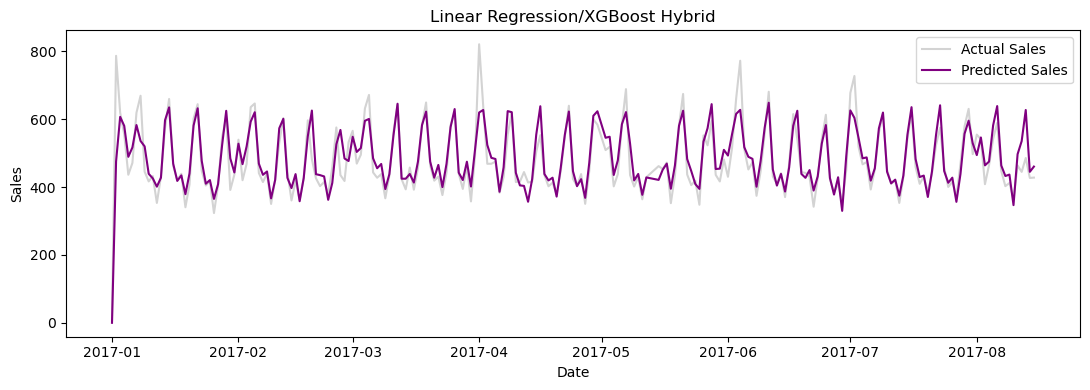

In [66]:
plt.plot(y_test_2016.loc['2017'].index.to_timestamp(), y_test_2016.loc['2017'], label="Actual Sales", color="lightgray")
plt.plot(y_test_2016.loc['2017'].index.to_timestamp(), y_pred_best[-len(y_test_2016.loc['2017'].index):], label="Predicted Sales", color='purple')
plt.legend()
plt.title("Linear Regression/XGBoost Hybrid")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# Future Work and Limitations


We've focused, here, entirely on the aggregated mean sales for all stores. Clearly that would have value for a company (pricing strategy, Operational and Financial planning, demand forecasting etc) but there is far more insight that can be gained from the data. We haven't attempted to predict store-wise or family-wise, nor have we used the store metadata that is available. The hybrid predictions could also be potentially improved using further feature enginneering, parameter tuning and widening the model search to include non-standard parameters for the best performing algorithms. 

The OnPromotion data particularly interests me - with the ability to produce sales predictions given 'OnPromotion' == 1 and with 'OnPromotion' == 0, we could predict the results of future sales, meaning the stores only reducing margin when it will have a proportional increase in sales.

The next step (the notebook will be updated when it's done) would be to ensure that the linear regression predictions are adding predictive power to the XGBoost regression at the end. As XGBoost is Decision Tree based , it cannot extrapolate to sales beyond the range within the training data (Chen and Guestrin, 2016). It would be unable to predict the general upwards trend of the sales. The assumption was made that the linear regression model would mitigate this, but it was not checked. We could also go back and remove New Year's Day from the linear regression - if we aren't using the predictions, it is likely to be adding noise with no benefit. 